## Contents
    01. Importing libraries and data
    02. Customer Profiling
        a. Age grouping
        b. Income grouping
        c. Department grouping
        d. Dependent grouping
    03. Hour grouping
    04. Additional visualizations and analysis
    05. Exporting final dataset and visualizations

## Import libaries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Import data

In [2]:
# setting path
path=r'/Users/alber/Instacart Basket Analysis/'

In [3]:
# importing dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'reg_activity_customers.pkl'))

## Customer Profiling 
Dataframe is of customers who are considered 'regular activity customers' which consist of customers having 5 or more orders.

### Age grouping:
    Age group 1: 18 <= Young Adult < 35
    Age group 2: 35 <= Adult < 60
    Age group 2: Senior >= 60

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_of_dependents,marital_status,income,Region,total_orders,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity
2,473747,1,3,3,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity
4,431534,1,5,4,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,Regular Activity


In [5]:
# using .loc to create profiling variable based on age
df.loc[(df['age'] >= 18) & (df['age'] < 35), 'age_range'] = '1'
df.loc[(df['age'] >= 35) & (df['age'] < 60), 'age_range'] = '2'
df.loc[(df['age'] >= 60), 'age_range'] = '3'
df['age_range'].value_counts()

2    12708810
3    11066290
1     8626875
Name: age_range, dtype: int64

In [6]:
# checking to make sure all data was grouped
12708810 + 11066290 + 8626875

32401975

In [7]:
df.shape

(32401975, 34)

Most customers (12,708,810) are between 46 and 59 years old and fall into the 'adult' range and the least customers (8,626,875) fall into the 'senior' age range.

## Income Grouping
     Low income: < $50,000
 Middle income: Between $50,000 and $120,000
 High income: > $120,000

In [8]:
# creating income flags
df.loc[df['income']<50000, 'income_flag'] ='Low Income'
df.loc[(df['income']>=50000) & (df['income']<=120000),'income_flag'] = 'Middle Income'
df.loc[(df['income']>120000),'income_flag'] = 'High Income'
df['income_flag'].value_counts(dropna=False)

Middle Income    19238403
High Income       9570582
Low Income        3592990
Name: income_flag, dtype: int64

In [9]:
# making sure all data was grouped successfully

In [10]:
19238403 + 9570582 + 3592990

32401975

The majority of customers (19,238,403) is within the 'Middle income' bracket making between 50,000 and 120,000. The least amount of customers (3,592,990) is within the 'Low income' making under 50,000.

## Department grouping

In [11]:
# import department df
dep=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [12]:
# creating data dictionary for department id
zipped = zip(dep['Unnamed: 0'], dep['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [13]:
# mapping department names to department id in dataframe
df['department']=df['department_id'].map(data_dict)
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,number_of_dependents,marital_status,income,Region,total_orders,activity_flag,age_range,income_flag,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,South,59,Regular Activity,1,Low Income,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,...,2/17/2019,3,married,40423,South,59,Regular Activity,1,Low Income,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,...,2/17/2019,3,married,40423,South,59,Regular Activity,1,Low Income,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,...,2/17/2019,3,married,40423,South,59,Regular Activity,1,Low Income,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,...,2/17/2019,3,married,40423,South,59,Regular Activity,1,Low Income,beverages


In [14]:
# creating subset for customers who purchased baby products
parent_customers=df.loc[df['department']=='babies']
parent_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,number_of_dependents,marital_status,income,Region,total_orders,activity_flag,age_range,income_flag,department
1508,1382150,109,6,1,9,15.0,False,3858,5,0,...,7/29/2018,1,married,41805,Northeast,69,Regular Activity,3,Low Income,babies
2893,2684151,290,22,6,10,7.0,False,45309,32,0,...,5/18/2019,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,babies
3508,2684151,290,22,6,10,7.0,False,15076,33,0,...,5/18/2019,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,babies
3982,2332460,420,21,5,17,11.0,False,14408,1,0,...,10/17/2018,2,married,97248,West,123,Regular Activity,1,Middle Income,babies
4030,58188,420,3,6,13,23.0,False,30161,7,0,...,10/17/2018,2,married,97248,West,123,Regular Activity,1,Middle Income,babies


In [15]:
# aggregating for parent expenditure
parent_customers.groupby('department').agg({'prices':['mean','min','max']})

prices           
                mean  min   max
department                     
babies      7.638374  1.0  15.0

In [16]:
# creating subset for customers who purchased pet products
pet_customers=df.loc[df['department']=='pets']
pet_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,date_joined,number_of_dependents,marital_status,income,Region,total_orders,activity_flag,age_range,income_flag,department
1495,659764,109,4,2,5,20.0,False,36273,9,0,...,7/29/2018,1,married,41805,Northeast,69,Regular Activity,3,Low Income,pets
1496,3116901,109,5,0,7,26.0,False,36273,3,1,...,7/29/2018,1,married,41805,Northeast,69,Regular Activity,3,Low Income,pets
2791,1439283,290,2,6,14,7.0,False,25860,8,0,...,5/18/2019,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,pets
2792,3080196,290,3,6,12,7.0,False,25860,21,1,...,5/18/2019,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,pets
2793,2881272,290,4,6,10,7.0,False,25860,7,1,...,5/18/2019,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,pets


In [17]:
pet_customers.groupby('department').agg({'prices':['mean','min','max']})

prices           
                mean  min   max
department                     
pets        7.889181  1.0  15.0

In [18]:
# checking which department has the most customer sales
df[['prices','department']].groupby('department').agg('sum').sort_values(by='prices',ascending=False)

,prices
department,
dairy eggs,180644624.2
produce,75656922.6
beverages,20641141.2
frozen,17287788.3
pantry,15019386.3
snacks,12344405.5
meat seafood,11550802.4
bakery,9207464.0
deli,8176975.6


Customers spent the most money (180,644,624.2) on dairy and eggs and the spent the least (253,661.7) on miscellaneous goods described as 'other'.

## Depending grouping
    No dependents = 0 dependents
    Has dependent/s = >= 1 dependent/s

In [19]:
# creating dependent_flag for customers
df.loc[df['number_of_dependents']==0,'dependent_flag'] = 'Parent'
df.loc[df['number_of_dependents']>0,'dependent_flag'] = 'Not Parent'

In [20]:
# checking data
df['dependent_flag'].value_counts()

Not Parent    24305226
Parent         8096749
Name: dependent_flag, dtype: int64

In [21]:
# aggregating dependent expenditure
df.groupby('dependent_flag').agg({'prices':['mean','min','max']})

prices              
                     mean  min      max
dependent_flag                         
Not Parent      11.930997  1.0  99999.0
Parent          12.117328  1.0  99999.0

There is not much of a difference between the expenditure of customers with or without dependents. However, customers with no dependents spend slightly more on average.

## Hour grouping
    Early morning: 12:00am - 05:59am 
    Morning: 06:00am - 11:59am
    Afternoon: 12:00pm-04:59pm
    Evening: 05:00pm - 08:59pm
    Night: 9:00pm - 11:59pm

In [22]:
# creating dataframe listing orders without any duplicates
df_ord = df.drop_duplicates(subset='order_id').copy()
df_ord.shape

(3212144, 37)

In [23]:
# grouping order_hour_of_day into the hour groupings.
df_ord.loc[(df_ord['order_hour_of_day']>0)&(df_ord['order_hour_of_day']<6),'time_of_day']='Early morning'
df_ord.loc[(df_ord['order_hour_of_day']>=6)&(df_ord['order_hour_of_day']<12),'time_of_day']='Morning'
df_ord.loc[(df_ord['order_hour_of_day']>=12)&(df_ord['order_hour_of_day']<17),'time_of_day']='Afternoon'
df_ord.loc[(df_ord['order_hour_of_day']>=17)&(df_ord['order_hour_of_day']<21),'time_of_day']='Evening'
df_ord.loc[(df_ord['order_hour_of_day']>=21)&(df_ord['order_hour_of_day']<24),'time_of_day']='Night'
df_ord['time_of_day'].value_counts()

Afternoon        1303937
Morning          1066187
Evening           614368
Night             168428
Early morning      37878
Name: time_of_day, dtype: int64

In [24]:
# checking values add up
1303937+1066187+614368+168428+59224

3212144

Most orders (1,303,937) take place during the afternoon between 12:00pm and 4:59pm. The least amount of orders (59,224) take place during the early morning.

## Additional visualizations & analysis

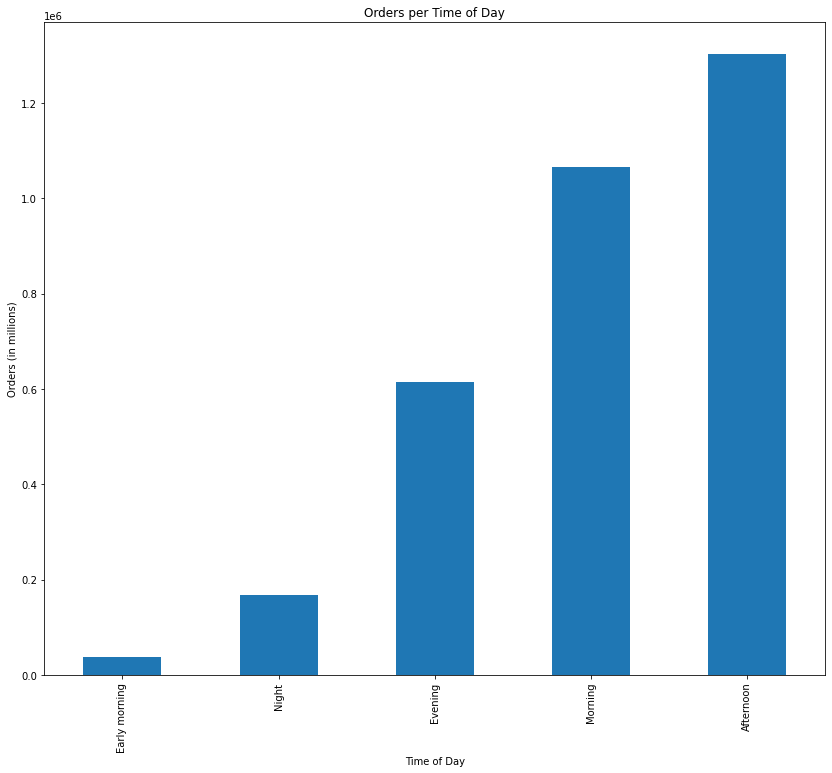

In [42]:
# creating bar graph displaying time of day when most orders are placed.
time_of_day_orders=df_ord['time_of_day'].value_counts().sort_values().plot.bar(figsize = [14,12])
plt.title('Orders per Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Orders (in millions)')
plt.show()

The least amount of orders take place in the early morning, 12:00am to 5:59am, and in the night, 9:00pm to 11:59pm.
The most amount of orders taking place during the morning and afternoon from 6:00am to 5:00pm

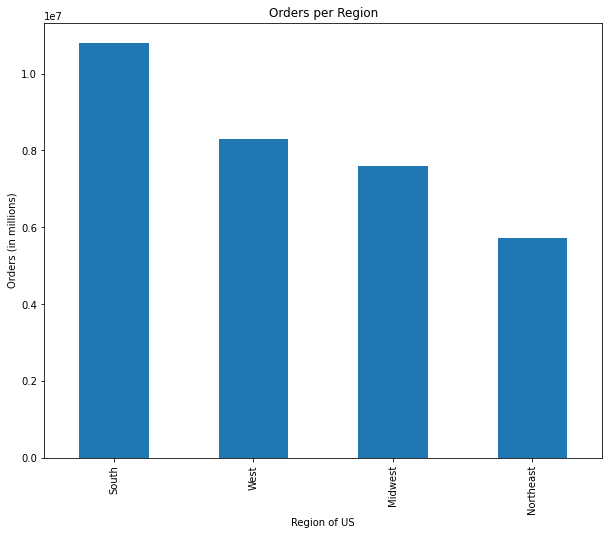

In [26]:
# regional distribution of customers
regional_bar=df['Region'].value_counts().plot.bar(figsize = [10,8])
plt.title('Orders per Region')
plt.xlabel('Region of US')
plt.ylabel('Orders (in millions)')
plt.show()

The most orders are from the Southern region of the U.S. and the least amount of orders comign from the Northeastern region of the U.S.

In [27]:
# creating crosstab for region and income flag
income_region=pd.crosstab(index=df['Region'],columns=df['income_flag'], normalize = "index")

# creating crosstab labels
income_region_labels=pd.crosstab(index=df['Region'],columns=df['income_flag'])

In [28]:
income_region.head()

income_flag,High Income,Low Income,Middle Income
Region,,,
Midwest,0.300031,0.110334,0.589635
Northeast,0.297402,0.109588,0.593011
South,0.292313,0.112971,0.594716
West,0.293677,0.109583,0.596740


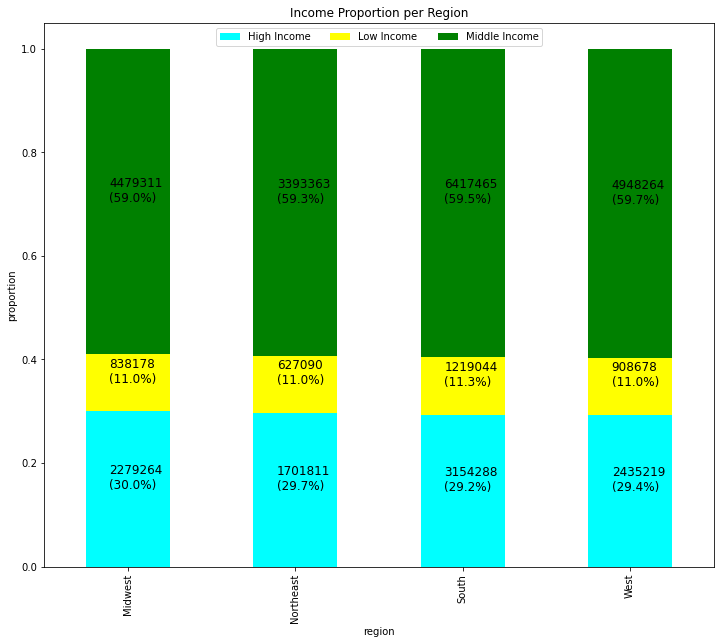

In [29]:
# creating stacked bar chart for regional income distribution
income_regional_dist=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['cyan','yellow','green'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.title("Income Proportion per Region")
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

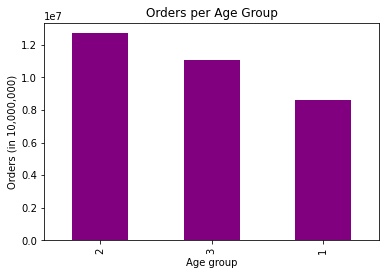

In [30]:
# creating bar chart for orders made by each age group
age_bar=df['age_range'].value_counts().plot.bar(color='purple')
plt.title('Orders per Age Group')
plt.xlabel('Age group')
plt.ylabel('Orders (in 10,000,000)')
plt.show()

    Age range 1: 18 <= Young Adult < 35
    Age range 2: 35 <= Adult < 60
    Age range 3: 60 <= Senior

Most customers are in the 'adult' range between 35 and 59 years old. The least amount of customers are in the 'young adult' range between the ages 18 and 35.

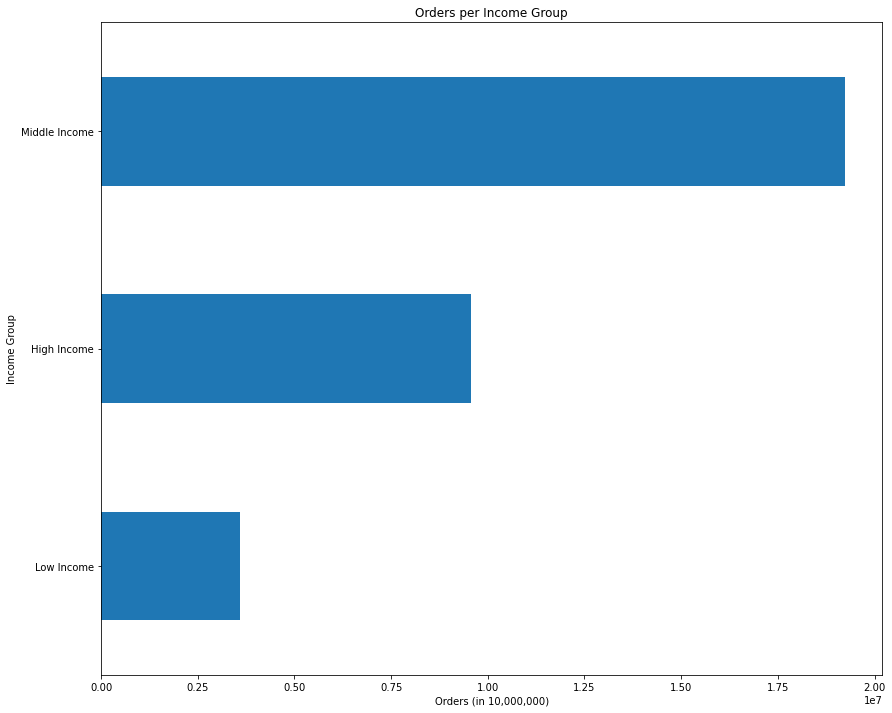

In [31]:
# creating bar chart for orders made by each income group
income_bar = df['income_flag'].value_counts().sort_values().plot.barh(figsize = [14,12])
plt.title('Orders per Income Group')
plt.xlabel('Orders (in 10,000,000)')
plt.ylabel('Income Group')
plt.show()

    Less than 50,000 = Low Income
    Between 50,000 & 120,000 = Middle Income
    Above 120,000 = High Income
    
Most customers fall within the middle income bracket, with the least amount of customers falling in the low income bracket.

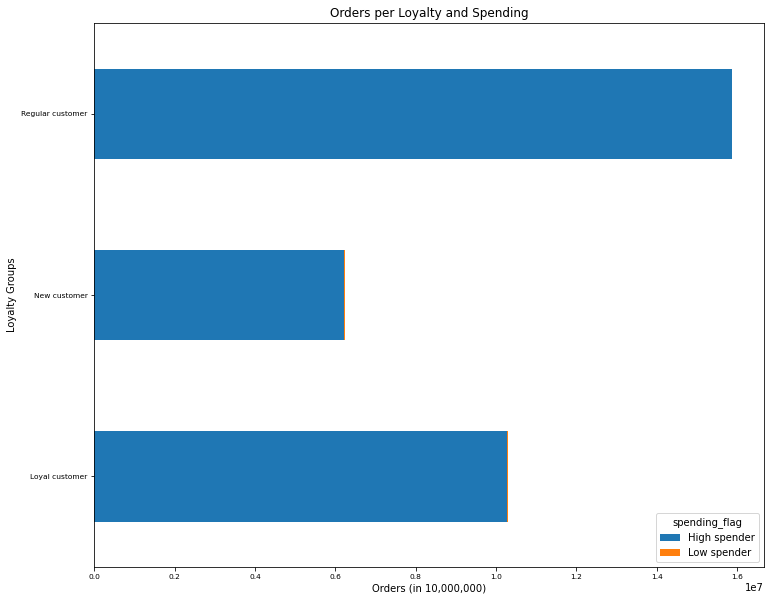

In [32]:
# creating stacked bar chart for loyalty customers using spending flag
loyalty_spending_bar=df.groupby('loyalty_flag')['spending_flag'].value_counts().unstack().plot.barh(stacked=True,
                                                                                        ylabel='counts',fontsize=7.5,figsize = [12,10])
plt.title('Orders per Loyalty and Spending')
plt.xlabel('Orders (in 10,000,000)')
plt.ylabel('Loyalty Groups')
plt.show()

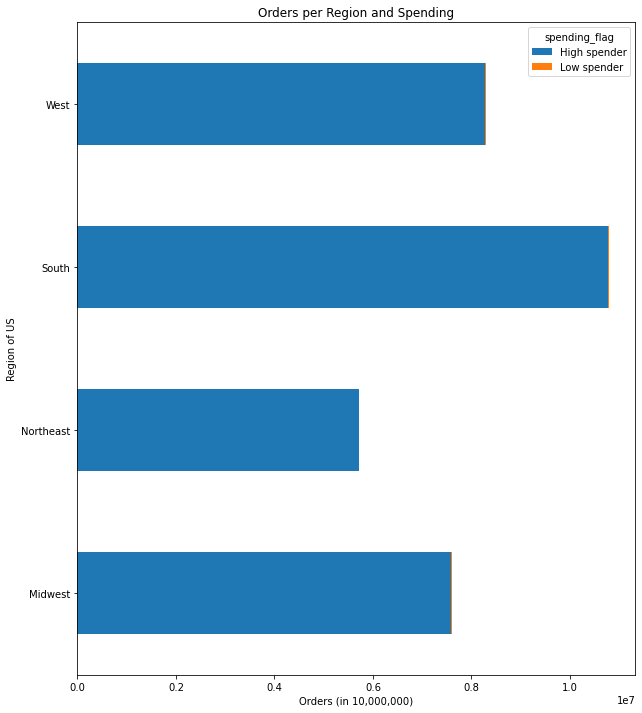

In [33]:
# creating stacked bar chart for regions using spending flag
regional_spending_bar=df.groupby('Region')['spending_flag'].value_counts().unstack().plot.barh(stacked=True,
                                                                                        ylabel='counts',figsize = [10,12])
plt.title('Orders per Region and Spending')
plt.xlabel('Orders (in 10,000,000)')
plt.ylabel('Region of US')
plt.show()

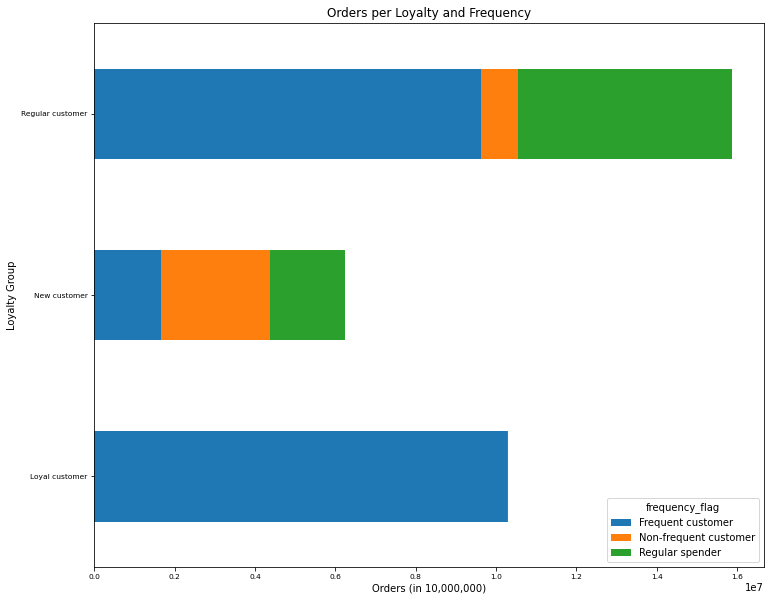

In [34]:
loyalty_frequency=df.groupby('loyalty_flag')['frequency_flag'].value_counts().unstack().plot.barh(stacked=True,
                                                                                        ylabel='counts',fontsize=7.5,figsize = [12,10])
plt.title('Orders per Loyalty and Frequency')
plt.xlabel('Orders (in 10,000,000)')
plt.ylabel('Loyalty Group')
plt.show()

In [35]:
df['spending_flag'].value_counts()

High spender    32371455
Low spender        30520
Name: spending_flag, dtype: int64

In [36]:
list(df)

['order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_last_order',
 'new_customer',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'product_name',
 'department_id',
 'prices',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_prices',
 'spending_flag',
 'median_days_since_previous_order',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_of_dependents',
 'marital_status',
 'income',
 'Region',
 'total_orders',
 'activity_flag',
 'age_range',
 'income_flag',
 'department',
 'dependent_flag']

In [37]:
#

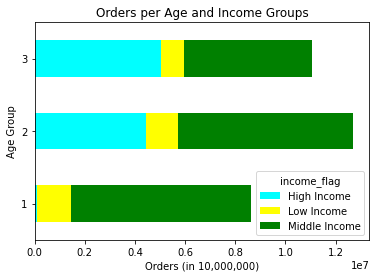

In [38]:
# creating a stacked bar chart for age groups and income
age_income_bar=df.groupby('age_range')['income_flag'].value_counts().unstack().plot.barh(stacked=True,
                                                                                        ylabel='counts',color=['cyan','yellow','green'])
plt.title('Orders per Age and Income Groups')
plt.xlabel('Orders (in 10,000,000)')
plt.ylabel('Age Group')
plt.show()

    Age range 1: 18 <= Young Adult < 35
    Age range 2: 35 <= Adult < 60
    Age range 3: 60 <= Senior

Most young adults and adults fall under the middle income bracket. Seniors seem to have an equal proportion of high income and middle income brackets. In both adults and seniors, low income is the smallest bracket.


As age increases so does the income status as shown by the increasing proportion of high income customers in each age range. 

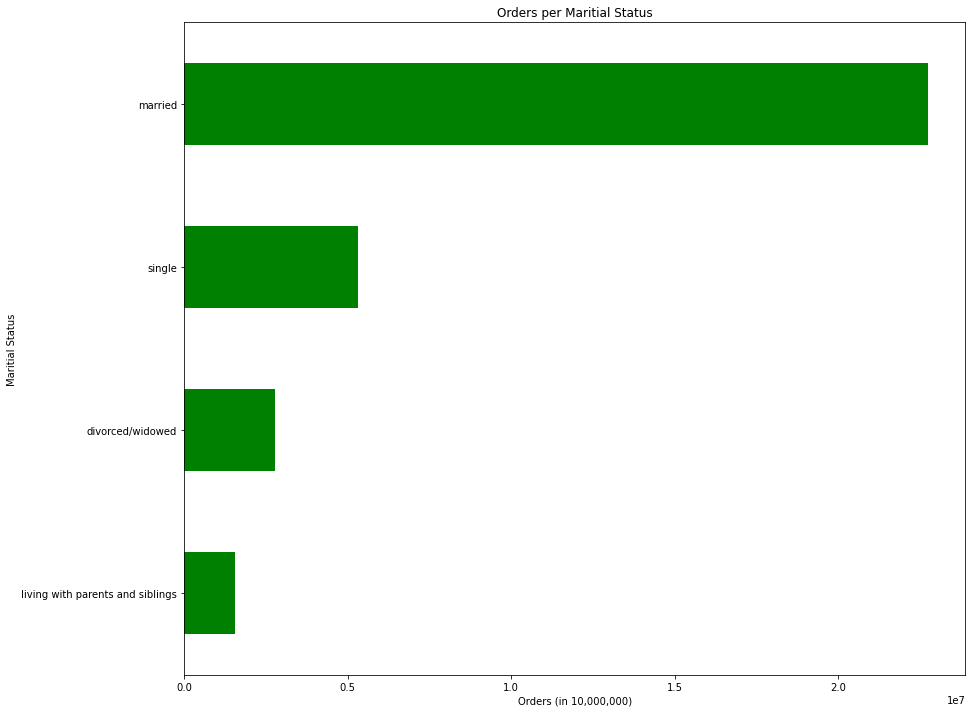

In [39]:
# creating bar chart for orders made by each familial status
martial_bar=df['marital_status'].value_counts().sort_values().plot.barh(color='green', figsize = [14,12])
plt.title('Orders per Maritial Status')
plt.xlabel('Orders (in 10,000,000)')
plt.ylabel('Maritial Status')
plt.show()

Most orders are made by customers who are married with the least orders made by customers who live with their parents and siblings.

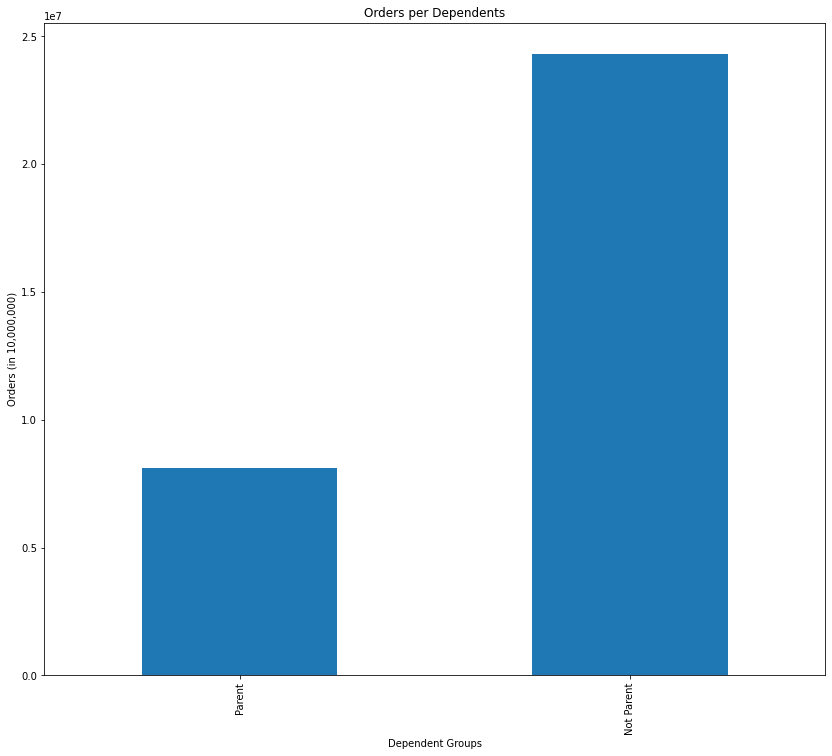

In [40]:
# creating bar chart for the orders made by customers with/without dependents
dependent_bar=df['dependent_flag'].value_counts().sort_values().plot.bar(figsize = [14,12])
plt.title('Orders per Dependents')
plt.xlabel('Dependent Groups')
plt.ylabel('Orders (in 10,000,000)')
plt.show()

Most orders are made by customers with dependents. The results make sense considering that most orders are made by married customers.

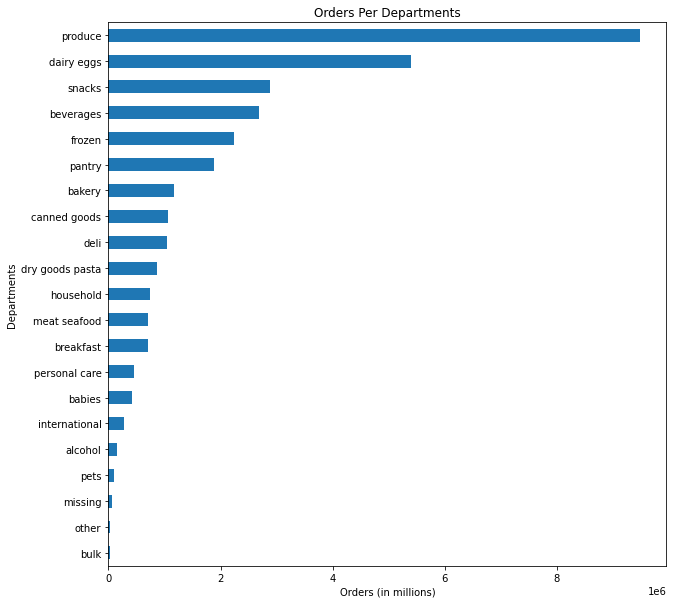

In [68]:
# bar chart showing orders made by each department
department_bar=df.department.value_counts().sort_values().plot(kind = 'barh', figsize = [10,10])
plt.title('Orders Per Departments')
plt.xlabel('Orders (in millions)')
plt.ylabel('Departments')
plt.show()

The 'produce' department has the most total orders whereas the 'bulk' has the least total orders.

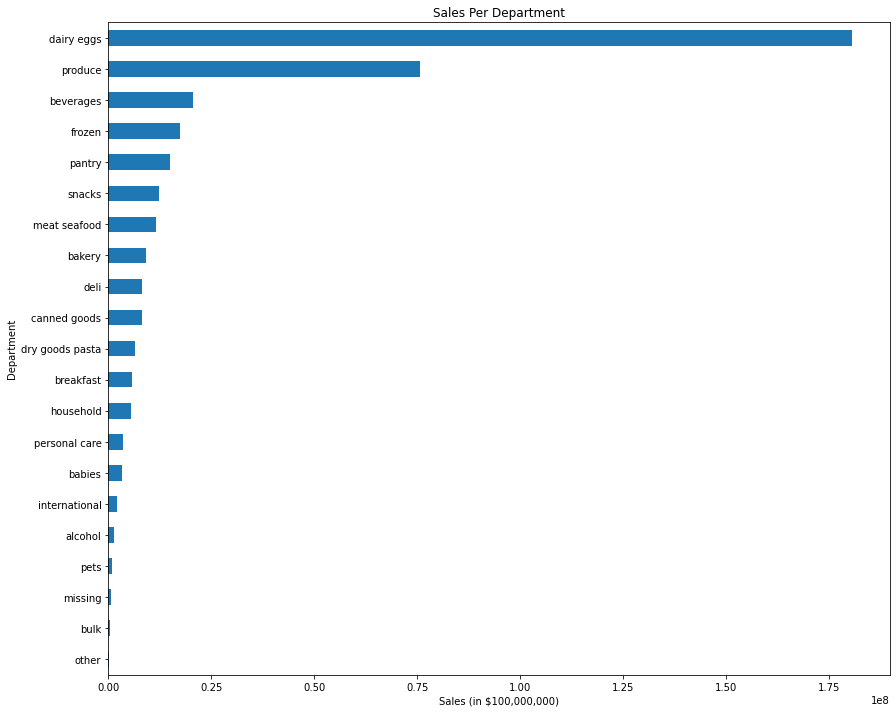

In [45]:
# creating new table just consisting of departments and prices
department_prices_sum=df[['department','prices']]

# creating bar graph from aggregating department prices to show department sales
department_sales = department_prices_sum.groupby('department').sum('prices').sort_values(['prices'],ascending=True).plot(kind = 'barh', figsize = [14,12])
plt.title("Sales Per Department")
plt.xlabel('Sales (in $100,000,000)')
plt.ylabel("Department")
plt.legend('',frameon=False)
plt.show()

In [46]:
# creating subset with userid and loyalty columns
cust_loyalty=df[['user_id','loyalty_flag']]
# removing duplicate values
cust_loyalty_unique=cust_loyalty.drop_duplicates()

In [47]:
cust_loyalty_unique['loyalty_flag'].value_counts()

New customer        111529
Regular customer     76864
Loyal customer       17017
Name: loyalty_flag, dtype: int64

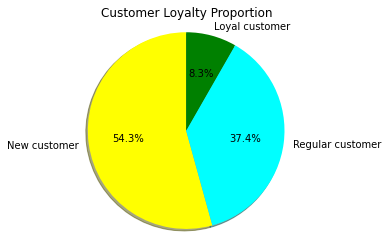

In [48]:
# creating pie chart for loyalty flag
labels = 'New customer', 'Regular customer', 'Loyal customer'
sizes = cust_loyalty_unique['loyalty_flag'].value_counts()
colors = ['yellow','cyan','green']
textprops = {"fontsize":10}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.title("Customer Loyalty Proportion")
plt.legend('',frameon=False)
plt.show()

## Exporting final dataset & visualizations

In [49]:
# exporting final dataset
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_dataset.pkl'))

In [50]:
# exporting bar graph displaying orders during time of day 
time_of_day_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'time_of_day_orders.png'))

In [51]:
# exporting regional distribution of customers
regional_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_bar.png'))

In [52]:
# exporting stacked bar chart showing income and region 
income_regional_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_regional_dist.png'))

In [53]:
# exporting bar chart for orders made by each age group
age_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_bar.png'))

In [54]:
# exporting bar chart for orders made by each income group
income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_bar.png'))

In [55]:
# exporting stacked bar showing age groups and income groups
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_stacked.png'))

In [56]:
# exporting bar chart showing the orders made by customers of each family status
martial_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'marital_bar.png'))

In [69]:
# exporting bar chart showing the amount of orders made by customers in each dependent flag
dependent_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependent_bar.png'))

In [70]:
# exporting department bar chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar.png'))

In [59]:
# export department bar chart
department_sales.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_sales.png'))

In [60]:
# exporting loyalty Pie Chart 
loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyal_dist_pie.png'))

In [61]:
# exporting loyalty spending stacked bar chart
loyalty_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending.png'))

In [62]:
# exporting regional spending stacked bar chart
regional_spending_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regional_spending.png'))

In [63]:
loyalty_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_frequency.png'))